In [1]:
import numpy as np
import pandas as pd  
import os
import random
from sklearn import preprocessing

In [2]:
train_csv_650_u = r'../../data/train_and_valid_merged_csv_u/train_data_csv/train_data_csv_650.csv' 
train_csv_650_Qtot = r'../../data/train_and_valid_merged_csv_Qtot/train_data_csv/train_csv.csv'
#train_csv_inside = r'../../data/merged_csv_inside/train_inside_csv_650/train_inside_csv_650.csv'
#train_csv_outside = r'../../data/merged_csv_outside/train_outside_csv_650/train_outside_csv_650.csv'

# valid_csv_all = r'../../data/merged_csv/valid_data_csv_74/valid_data_csv_74.csv'
# valid_csv_inside = r'../../data/merged_csv_inside/valid_inside_csv_74/valid_inside_csv_74.csv'
# valid_csv_outside = r'../../data/merged_csv_outside/valid_outside_csv_74/valid_outside_csv_74.csv'

In [3]:
df_train_u = pd.read_csv(train_csv_650_u,\
                         header = None,\
                         names=['x','y','z','D1A','D2A','D1B','D2B','angle','u','Dtot','U','P','C'],\
                         encoding="utf8")  #编码默认UTF-8，若乱码自行更改

df_train_Qtot = pd.read_csv(train_csv_650_Qtot,\
                         header = None,\
                         names=['x','y','z','D1A','D2A','D1B','D2B','angle','Qtot','Dtot','U','P','C'],\
                         encoding="utf8")  #编码默认UTF-8，若乱码自行更改
print("the lenth of df_train_u is %d"%len(df_train_u))
print("the lenth of df_train_Qtot is %d"%len(df_train_Qtot))
#print("the lenth of df_train_inside is %d"%len(df_train_inside))
#print("the lenth of df_train_outside is %d"%len(df_train_outside))

the lenth of df_train_u is 184694918
the lenth of df_train_Qtot is 148374854


In [4]:
print(df_train_u.max())
print(df_train_u.min())
print(df_train_u.max() - df_train_u.min())

x           0.026853
y           0.002408
z           0.000545
D1A         0.000600
D2A         0.000300
D1B         0.000600
D2B         0.000300
angle     120.000000
u           0.193190
Dtot        0.001100
U           0.623670
P        2171.800000
C        1892.600000
dtype: float64
x          0.000000
y         -0.002408
z         -0.000545
D1A        0.000300
D2A        0.000200
D1B        0.000300
D2B        0.000200
angle     30.000000
u          0.045905
Dtot       0.000500
U          0.000000
P        -52.899000
C        610.000000
dtype: float64
x           0.026853
y           0.004815
z           0.001090
D1A         0.000300
D2A         0.000100
D1B         0.000300
D2B         0.000100
angle      90.000000
u           0.147285
Dtot        0.000600
U           0.623670
P        2224.699000
C        1282.600000
dtype: float64


In [5]:
print(df_train_Qtot.max())
print(df_train_Qtot.min())
print(df_train_Qtot.max() - df_train_Qtot.min())

x           0.026853
y           0.002408
z           0.000545
D1A         0.000600
D2A         0.000300
D1B         0.000600
D2B         0.000300
angle     120.000000
Qtot      373.080000
Dtot        0.001100
U           0.630800
P        2171.800000
C        1892.600000
dtype: float64
x       -1.503900e-15
y       -2.407600e-03
z       -5.450000e-04
D1A      3.000000e-04
D2A      2.000000e-04
D1B      3.000000e-04
D2B      2.000000e-04
angle    3.000000e+01
Qtot     4.537300e+01
Dtot     5.000000e-04
U        0.000000e+00
P       -5.289900e+01
C        6.000000e+02
dtype: float64
x           0.026853
y           0.004815
z           0.001090
D1A         0.000300
D2A         0.000100
D1B         0.000300
D2B         0.000100
angle      90.000000
Qtot      327.707000
Dtot        0.000600
U           0.630800
P        2224.699000
C        1292.600000
dtype: float64


In [6]:
np.where(np.isnan(df_train_u))

(array([], dtype=int64), array([], dtype=int64))

In [7]:
np.where(np.isinf(df_train_u)) #这个和上面那个就已经确保了df里面没有inf和nan值

(array([], dtype=int64), array([], dtype=int64))

In [8]:
np.where(np.isnan(df_train_Qtot))

(array([], dtype=int64), array([], dtype=int64))

In [9]:
np.where(np.isinf(df_train_Qtot))

(array([], dtype=int64), array([], dtype=int64))

In [7]:
#所以这两个也是不需要的
#df.replace("nan",np.nan, inplace = True)
#print(len(df))

In [8]:
#df.dropna(inplace=True)  #处理很大的dataframe时，用dropna()会报错，这是pandas自己的问题
#由于上面已经检查过了，我们的代码不需要dropna()
#df.replace([np.inf, -np.inf], np.nan).dropna(axis=0, inplace=True)
#print(len(df))

In [9]:
#print(type(df))
#df = preprocessing.MinMaxScaler().fit_transform(df)
#print(type(df))
X = df.values[:, :-3].astype('float32')
print(type(X))

<class 'numpy.ndarray'>


In [10]:
print(len(X))
print(len(X[1]))
print(X[1])

184605532
10
[1.0000e+00 3.3880e-02 2.6952e-01 3.0000e-04 2.0000e-04 3.0000e-04
 3.0000e-04 6.6000e+01 9.0753e+01 5.0000e-04]


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


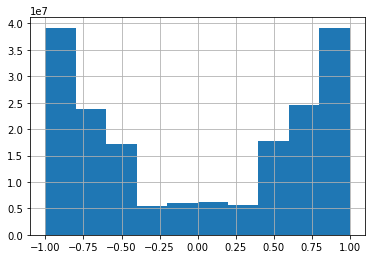

In [11]:
df[['z']] = preprocessing.MinMaxScaler(feature_range=(-1, 1)).fit_transform(df[['z']])
U=df['z'].hist().get_figure()
print(type(df))
print(type(df[['z']]))

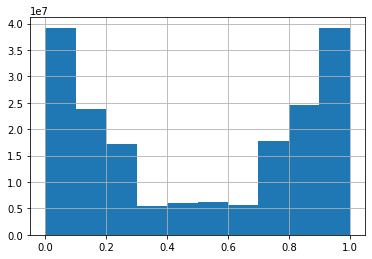

In [12]:
df[['z']] = preprocessing.MinMaxScaler().fit_transform(df[['z']])
U=df['z'].hist().get_figure()

U    0.62367
dtype: float64
U    0.0
dtype: float64


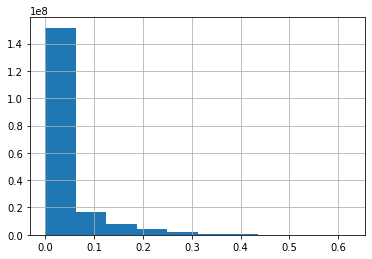

In [13]:
print(df[['U']].max())
print(df[['U']].min())
U=df['U'].hist().get_figure()

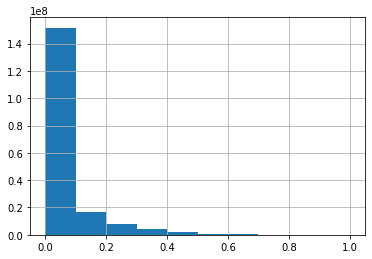

In [14]:
df[['z']] = preprocessing.MinMaxScaler().fit_transform(df[['U']])
U=df['z'].hist().get_figure()

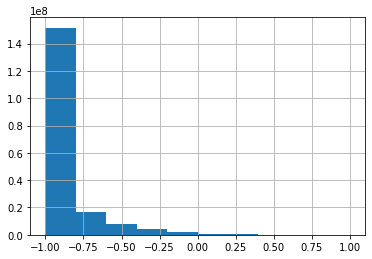

In [15]:
df[['z']] = preprocessing.MinMaxScaler(feature_range=(-1, 1)).fit_transform(df[['U']])
U=df['z'].hist().get_figure()

z    9.570165
dtype: float64
z   -0.597774
dtype: float64


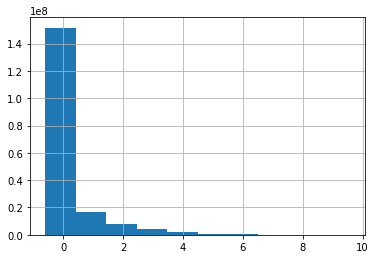

In [16]:
df[['z']] = preprocessing.StandardScaler().fit_transform(df[['U']])
print(df[['z']].max())
print(df[['z']].min())
U=df['z'].hist().get_figure()

z    1.0
dtype: float64
z    0.0
dtype: float64


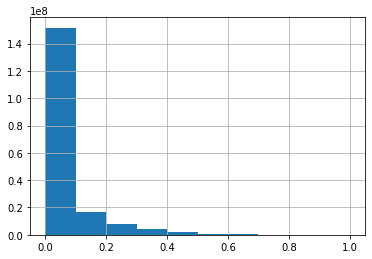

In [17]:
df[['z']] = preprocessing.MaxAbsScaler().fit_transform(df[['U']])
print(df[['z']].max())
print(df[['z']].min())
U=df['z'].hist().get_figure()

z    1.0
dtype: float64
z    0.0
dtype: float64


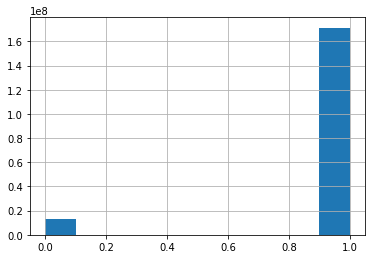

In [18]:
df[['z']] = preprocessing.Normalizer().fit_transform(df[['U']])
print(df[['z']].max())
print(df[['z']].min())
U=df['z'].hist().get_figure()

P    2171.8
dtype: float64
P   -52.899
dtype: float64


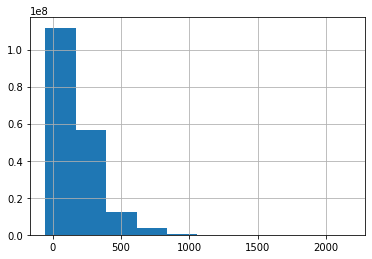

In [19]:
print(df[['P']].max())
print(df[['P']].min())
P=df['P'].hist().get_figure()
#d.savefig('x.jpg')

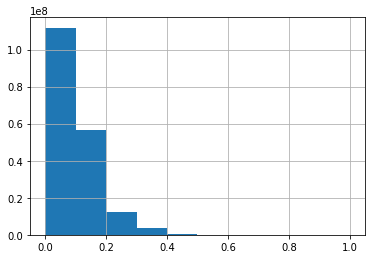

In [20]:
df[['z']] = preprocessing.MinMaxScaler().fit_transform(df[['P']])
P=df['z'].hist().get_figure()

z    12.978921
dtype: float64
z   -1.436115
dtype: float64


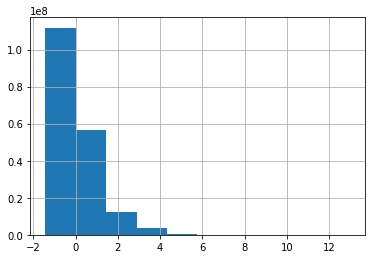

In [21]:
df[['z']] = preprocessing.StandardScaler().fit_transform(df[['P']])
print(df[['z']].max())
print(df[['z']].min())
P=df['z'].hist().get_figure()

z    1.0
dtype: float64
z   -0.024357
dtype: float64


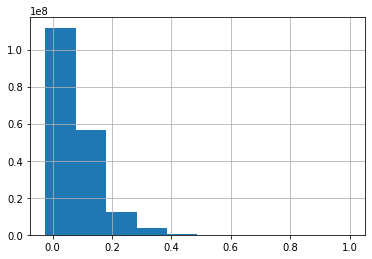

In [22]:
df[['z']] = preprocessing.MaxAbsScaler().fit_transform(df[['P']])
print(df[['z']].max())
print(df[['z']].min())
U=df['z'].hist().get_figure()

z    1.0
dtype: float64
z   -1.0
dtype: float64


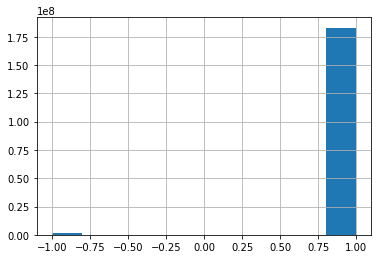

In [23]:
df[['z']] = preprocessing.Normalizer().fit_transform(df[['P']])
print(df[['z']].max())
print(df[['z']].min())
P=df['z'].hist().get_figure()

C    1892.6
dtype: float64
C    610.0
dtype: float64


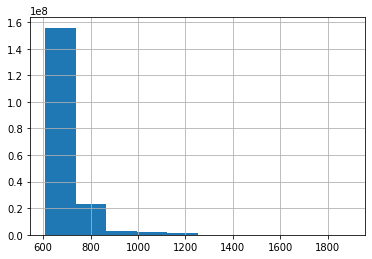

In [24]:
print(df[['C']].max())
print(df[['C']].min())
C=df['C'].hist().get_figure()

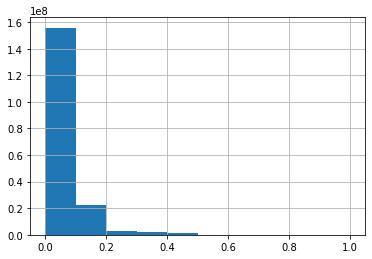

In [25]:
df[['z']] = preprocessing.MinMaxScaler().fit_transform(df[['C']])
C=df['z'].hist().get_figure()

z    14.286869
dtype: float64
z   -0.7806
dtype: float64


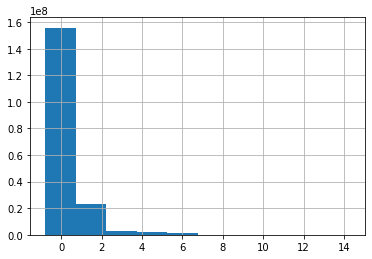

In [26]:
df[['z']] = preprocessing.StandardScaler().fit_transform(df[['C']])
print(df[['z']].max())
print(df[['z']].min())
C=df['z'].hist().get_figure()

z    1.0
dtype: float64
z    0.322308
dtype: float64


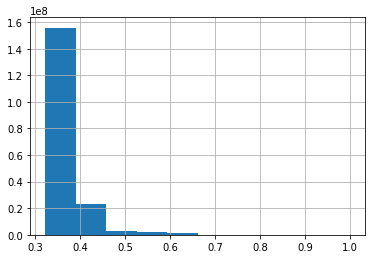

In [27]:
df[['z']] = preprocessing.MaxAbsScaler().fit_transform(df[['C']])
print(df[['z']].max())
print(df[['z']].min())
U=df['z'].hist().get_figure()

z    1.0
dtype: float64
z    1.0
dtype: float64


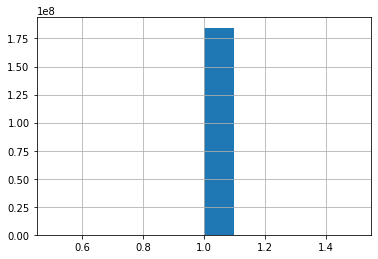

In [28]:
df[['z']] = preprocessing.Normalizer().fit_transform(df[['C']])
print(df[['z']].max())
print(df[['z']].min())
C=df['z'].hist().get_figure()